# Data Analysis 

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pylab
from pylab import rcParams
import scipy.stats as st

## Load Data

In [2]:
data = pd.read_csv(
    './data.csv',
    index_col='DateTime',
    parse_dates=['DateTime'])
data.head()

,MentalHealthTweets,UV,CloudCover
DateTime,,,
2019-01-01 21:14:00,1.0,0.47,75.0
2019-01-01 21:20:00,0.0,0.47,75.0
2019-01-01 21:24:00,0.0,0.47,75.0
2019-01-01 21:30:00,0.0,0.47,90.0
2019-01-01 21:34:00,0.0,0.47,90.0


## Plot Tweets

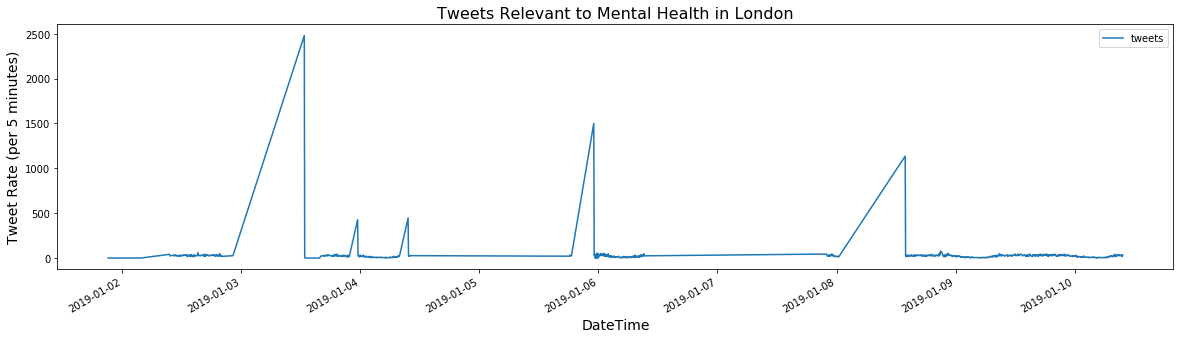

In [3]:
plt.figure(figsize=(20, 5))
data['MentalHealthTweets'].plot(label ="tweets")
plt.title("Tweets Relevant to Mental Health in London").set_fontsize(16)
plt.ylabel('Tweet Rate (per 5 minutes)').set_fontsize(14)
plt.xlabel('DateTime').set_fontsize(14)
plt.legend()
plt.show()

## Clean Data

Identify duplicate datapoints 

In [4]:
data[data.index.duplicated()]

,MentalHealthTweets,UV,CloudCover
DateTime,,,
2019-01-05 23:25:00,2.0,0.45,90.0
2019-01-05 23:30:00,6.0,0.45,90.0
2019-01-05 23:35:00,4.0,0.45,90.0
2019-01-05 23:40:00,5.0,0.45,90.0
2019-01-05 23:45:00,4.0,0.45,90.0
2019-01-05 23:50:00,0.0,0.45,90.0
2019-01-05 23:55:00,6.0,0.48,90.0
2019-01-06 00:00:00,6.0,0.48,90.0


Delete duplicate datapoints

In [5]:
data = data[~data.index.duplicated()]

Find mean and standard deviation

In [6]:
tweet_mean = float(data['MentalHealthTweets'].mean())
tweet_std = float(data['MentalHealthTweets'].std())

print('Mean Tweet Frequency (per 5 mins) = ' + str(tweet_mean))
print('Tweet Frequency Standard Deviation = ' + str(tweet_std))

Mean Tweet Frequency (per 5 mins) = 27.330106485963213
Tweet Frequency Standard Deviation = 98.15032783617725


Remove entries with tweets per 5 mins outside of 2 standard deviations from the mean

In [7]:
drop = []
ub = tweet_mean + 2 * tweet_std
lb = tweet_mean - 2 * tweet_std

for index, row in data.iterrows():
    tweets = float(row['MentalHealthTweets'])
    uv = row['UV']
    if tweets > ub or tweets < lb or tweets <= 0:
        drop.append(index)
    if str(uv) == 'N':
        drop.append(index)  
        
data_cleaned = data.drop(drop, axis=0)
data_cleaned = data_cleaned.astype(float)

tweet_mean = float(data_cleaned['MentalHealthTweets'].mean())
tweet_std = float(data_cleaned['MentalHealthTweets'].std())

print('Mean Tweet Frequency (per 5 mins) = ' + str(tweet_mean))
print('Tweet Frequency Standard Deviation = ' + str(tweet_std))

Mean Tweet Frequency (per 5 mins) = 22.648453608247422
Tweet Frequency Standard Deviation = 11.667615589320596


## Plot Cleaned Data

Plot tweets

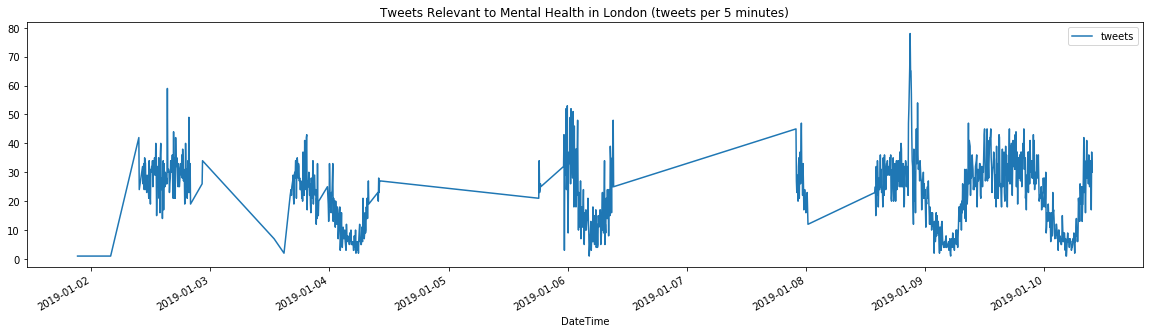

In [8]:
plt.figure(figsize=(20, 5))
data_cleaned['MentalHealthTweets'].plot(label ="tweets")
plt.title("Tweets Relevant to Mental Health in London (tweets per 5 minutes)")
plt.xlabel('DateTime')
plt.legend()
plt.show()

Plot UV and cloud cover

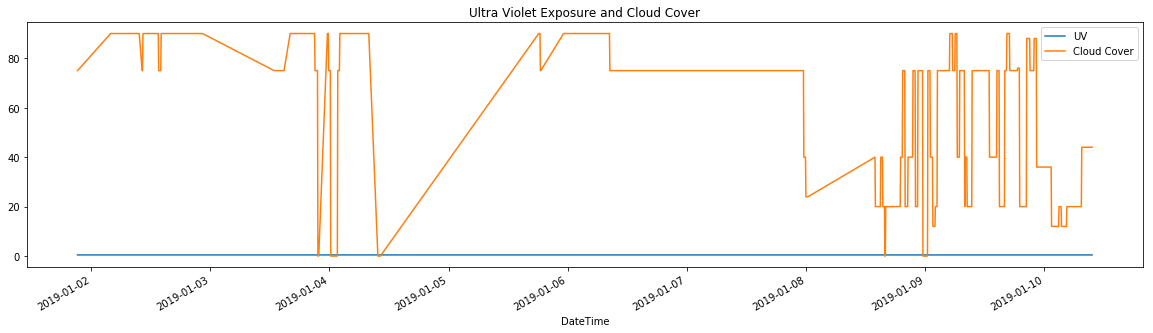

In [9]:
plt.figure(figsize=(20, 5))
data_cleaned['UV'].plot(label ="UV") 
data_cleaned['CloudCover'].plot(label ="Cloud Cover") 
plt.title("Ultra Violet Exposure and Cloud Cover")
plt.legend()
plt.show()

## Normalize Data

Normalize number of tweets, UV exposure and cloud cover using mean and standard deviation

In [10]:
data_normalized=(data_cleaned-data_cleaned.mean())/data_cleaned.std()

Plot normalized weather data

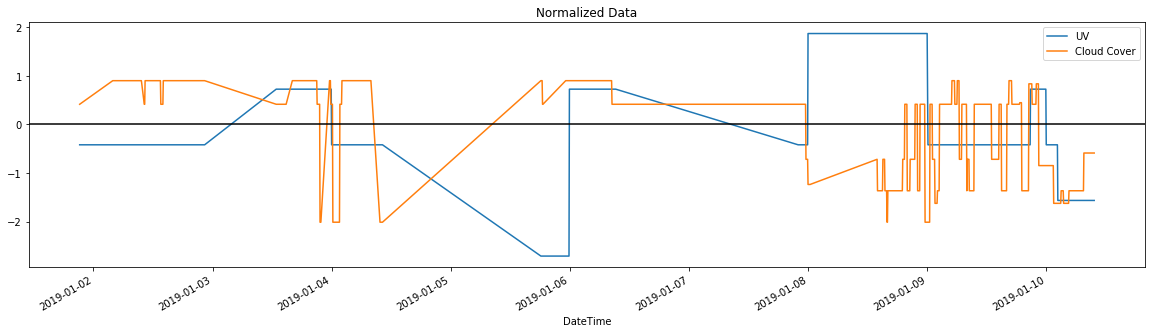

In [11]:
plt.figure(figsize=(20, 5))
data_normalized['UV'].plot(label ="UV") 
data_normalized['CloudCover'].plot(label ="Cloud Cover") 
plt.axhline(0, color='black')
plt.title("Normalized Data")
plt.legend()
plt.show()

Plot normalized tweets

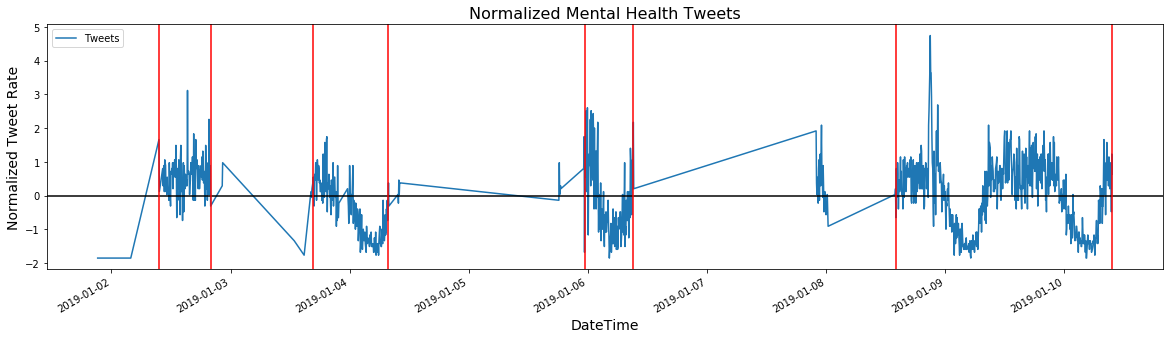

In [55]:
tweets = data_normalized['MentalHealthTweets']

plt.figure(figsize=(20, 5))
tweets.plot(label ="Tweets")  
plt.axhline(0, color='black')
plt.title("Normalized Mental Health Tweets").set_fontsize(16)
plt.ylabel('Normalized Tweet Rate').set_fontsize(14)
plt.xlabel('DateTime').set_fontsize(14)

plt.axvline(x=data_normalized.index[2], color="red")
plt.axvline(x=data_normalized.index[120], color="red")
plt.axvline(x=data_normalized.index[130], color="red")
plt.axvline(x=data_normalized.index[290], color="red")
plt.axvline(x=data_normalized.index[310], color="red")
plt.axvline(x=data_normalized.index[425], color="red")
plt.axvline(x=data_normalized.index[460], color="red")
plt.axvline(x=data_normalized.index[-1], color="red")

plt.legend()
plt.show()

## Autocorrelation

### Plot autocorrelated tweets

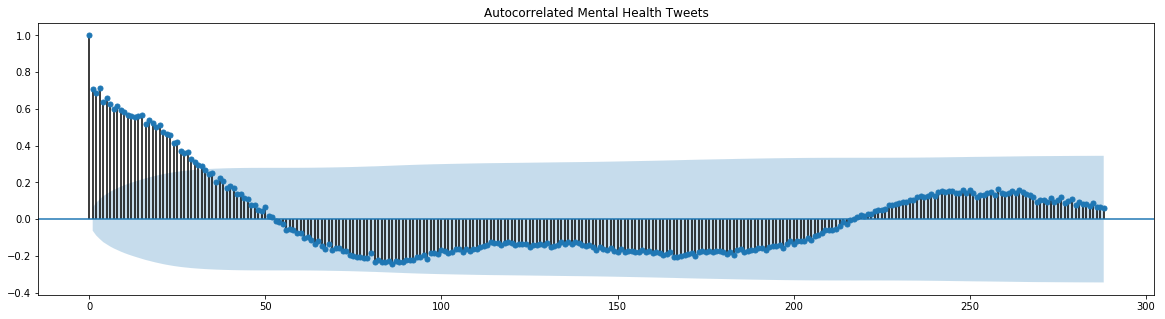

In [13]:
hour_lag = 12
day_lag = hour_lag*24
week_lag = day_lag*7
month_lag = week_lag*4

acf = plot_acf(tweets, lags=day_lag,title="Autocorrelated Mental Health Tweets")
acf.set_figwidth(20)
acf.set_figheight(5)
plt.show()

Isolate lagrest segment of continuous readings

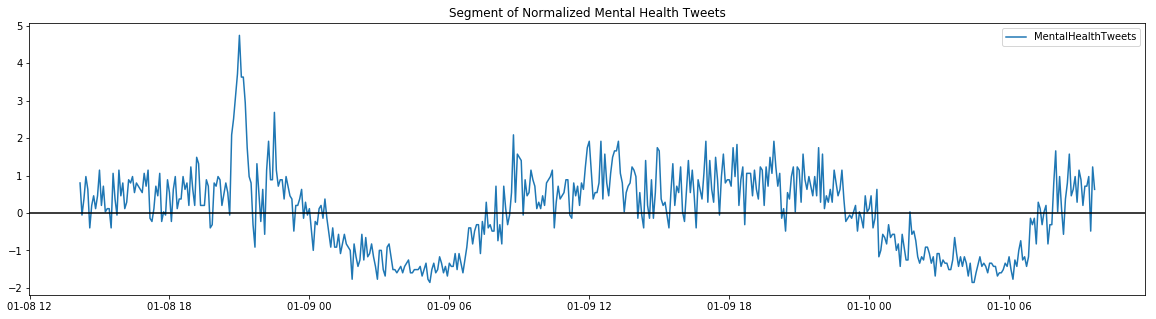

In [14]:
tweets_segment = tweets[460:]

plt.figure(figsize=(20, 5))
plt.plot(tweets_segment.index,tweets_segment)
plt.axhline(0, color='black')
plt.title("Segment of Normalized Mental Health Tweets")
plt.legend()
plt.show()

Plot autocorrelated tweet segment

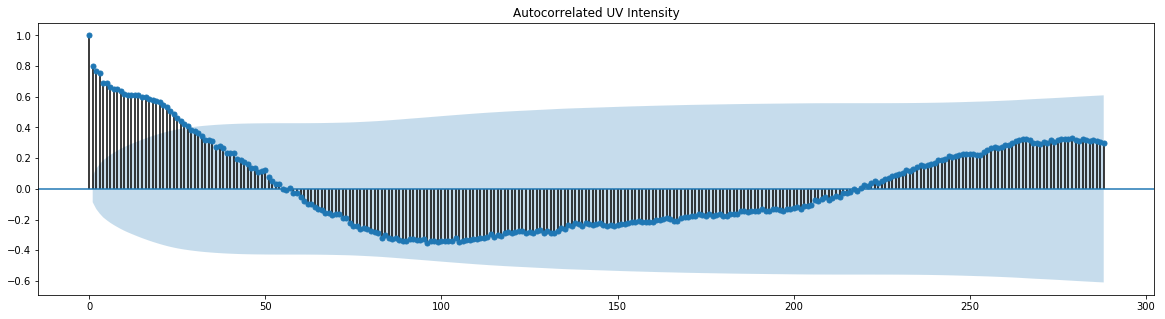

In [15]:
acf = plot_acf(tweets_segment, lags=day_lag,title="Autocorrelated UV Intensity")
acf.set_figwidth(20)
acf.set_figheight(5)
plt.show()

In both analyses there is no significant autocorrelation beyond 40 lags, which is approximately 3 hours

### Plot autocorrelated weather data

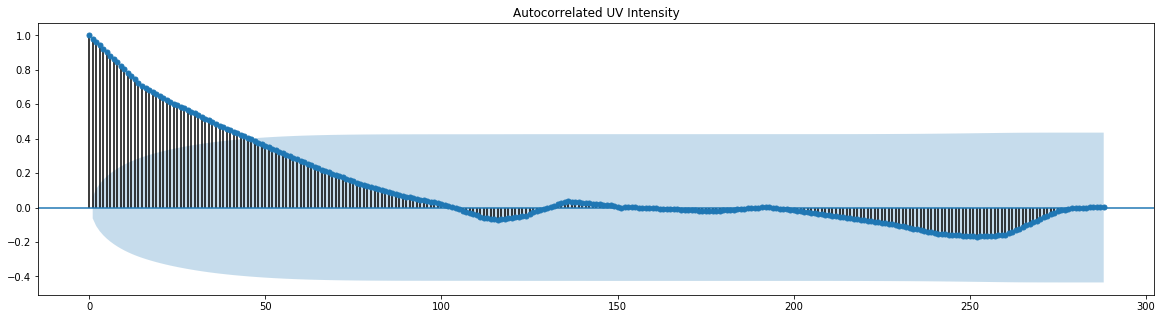

In [16]:
uv = data_normalized['UV']

acf = plot_acf(uv, lags=day_lag,title="Autocorrelated UV Intensity")
acf.set_figwidth(20)
acf.set_figheight(5)
plt.show()

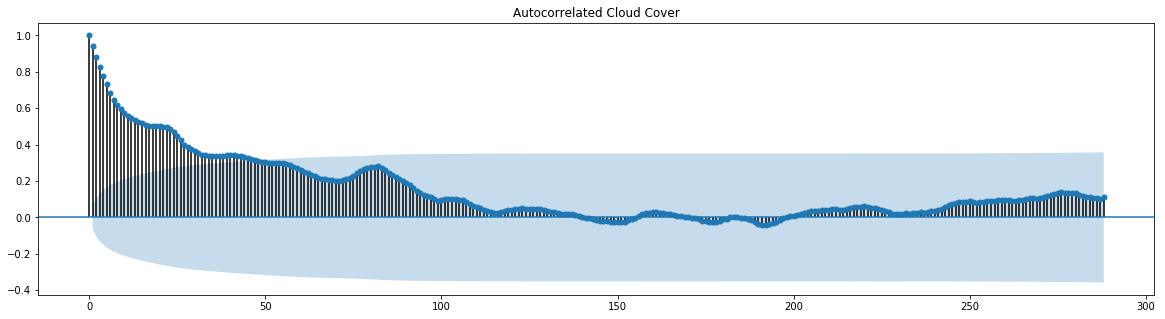

In [17]:
cc = data_normalized['CloudCover']

acf = plot_acf(cc, lags=day_lag,title="Autocorrelated Cloud Cover")
acf.set_figwidth(20)
acf.set_figheight(5)
plt.show()

### Plot partial autocorrelated tweets

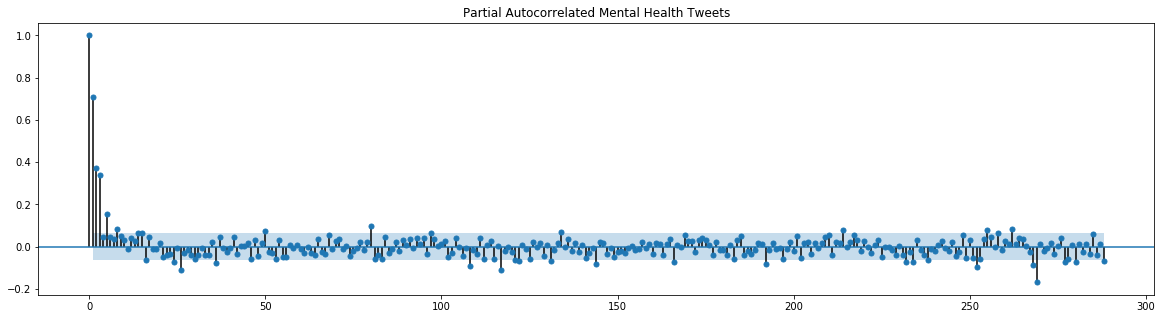

In [18]:
acf = plot_pacf(tweets, lags=day_lag,title="Partial Autocorrelated Mental Health Tweets")
acf.set_figwidth(20)
acf.set_figheight(5)
plt.show()

## Filter Tweets

Low pass filter

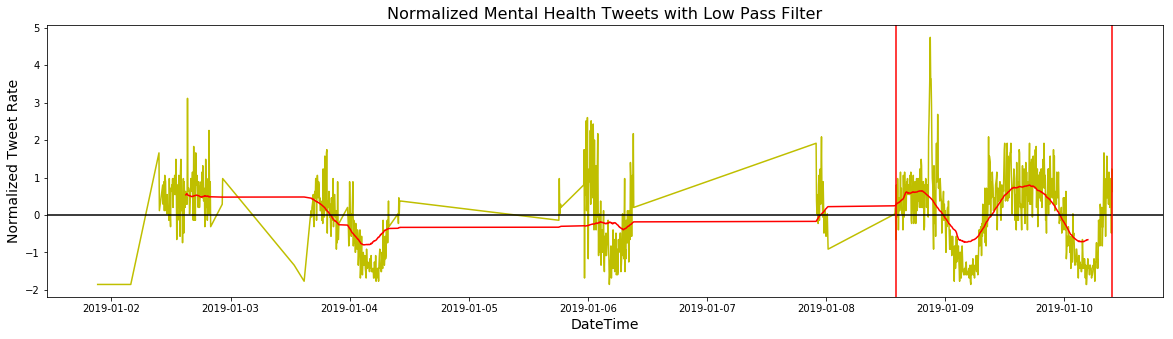

In [56]:
windowSize = 5*24
lowPassFilteredSignal = tweets.rolling(windowSize, center=True).mean()

plt.figure(figsize=(20, 5))
plt.plot(tweets.index,tweets,c='y')
plt.plot(tweets.index,lowPassFilteredSignal,c='r')
plt.axhline(0, color='black')
plt.axvline(x=data_normalized.index[460], color="red")
plt.axvline(x=data_normalized.index[-1], color="red")
plt.title("Normalized Mental Health Tweets with Low Pass Filter").set_fontsize(16)
plt.ylabel('Normalized Tweet Rate').set_fontsize(14)
plt.xlabel('DateTime').set_fontsize(14)
plt.show()

High pass filter

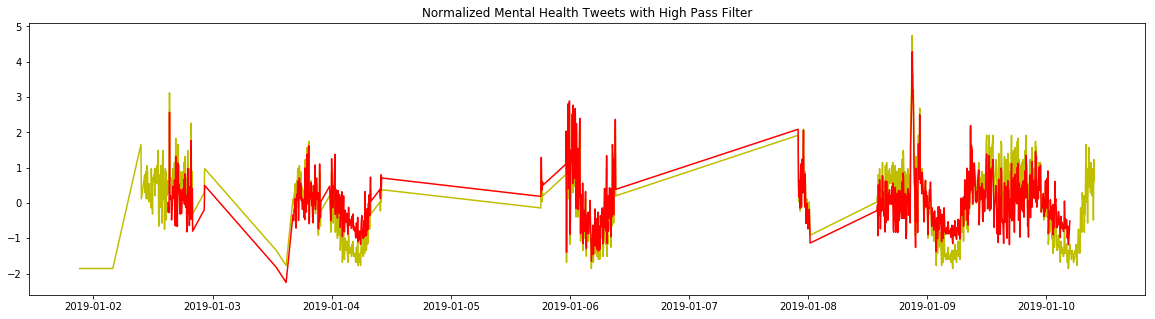

In [20]:
highPassFilteredSignal = tweets - lowPassFilteredSignal

plt.figure(figsize=(20, 5))
plt.plot(tweets.index,tweets,c='y')
plt.plot(tweets.index,highPassFilteredSignal,c='r')
plt.title("Normalized Mental Health Tweets with High Pass Filter")
plt.show()

Due to the size of the dataset the signal is still very noisy with a high pass filter. With a larger dataset this operation should yeild the daily periodicity of the signal.

## Fast Fourier Transform

Below is the FFT of the normalized tweet data. As the magnitude of each frequency component is symetrical, only half of the transformed signal needs to be plotted.


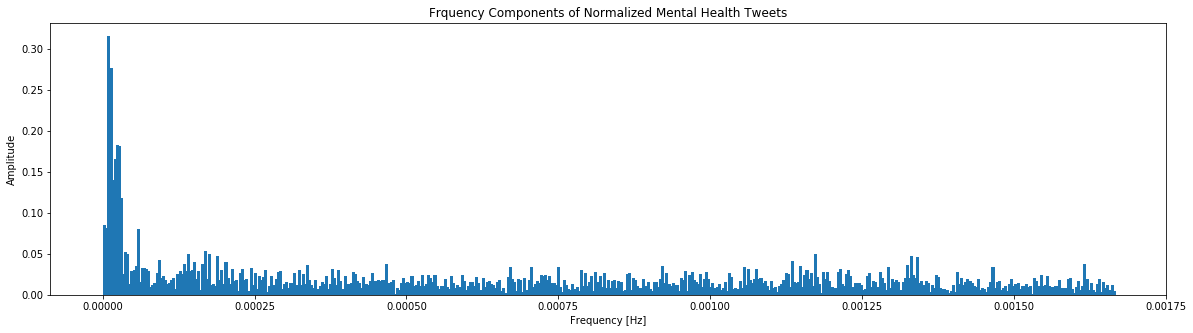

In [21]:
T = 60*5 # Tweets (per 5 min) was sampled with a period of 5 mins
N = tweets.size

f = np.linspace(0, 1/T, N)
transform = np.abs(np.fft.fft(tweets))[:N // 2] * 1 / N

plt.figure(figsize=(20, 5))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.bar(f[:N // 2], transform, width=0.000005)
plt.title("Frquency Components of Normalized Mental Health Tweets")
plt.show()

Dominant frequency

In [22]:
dom_freq = f[list(transform).index(max(transform))]
dom_period = 1/dom_freq
print('Dominant frequency: ' + str(round(dom_freq, 10)) + ' Hz')
print('Dominant period: ' + str(round(dom_period, 3)) + ' seconds')
print('Dominant period: ' + str(round(dom_period/(60*60*24), 3)) + ' days')

Dominant frequency: 1.03199e-05 Hz
Dominant period: 96900.0 seconds
Dominant period: 1.122 days


Because of the fragmented nature of the dataset, the largest section of continuous readings will be isolated and the proceedure carried out again.

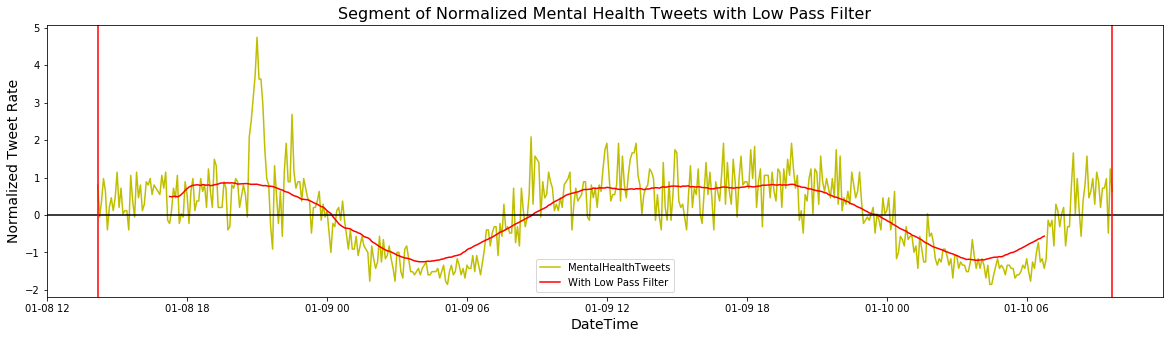

In [57]:
tweets_segment = tweets[460:]
tweets_segmentlowPass = tweets_segment.rolling(3*24, center=True).mean()

plt.figure(figsize=(20, 5))
plt.plot(tweets_segment.index,tweets_segment,c='y')
plt.plot(tweets_segment.index,tweets_segmentlowPass,c='r',label='With Low Pass Filter')
plt.axhline(0, color='black')
plt.axvline(x=data_normalized.index[460], color="red")
plt.axvline(x=data_normalized.index[-1], color="red")
plt.title("Segment of Normalized Mental Health Tweets with Low Pass Filter").set_fontsize(16)
plt.ylabel('Normalized Tweet Rate').set_fontsize(14)
plt.xlabel('DateTime').set_fontsize(14)
plt.legend()
plt.show()

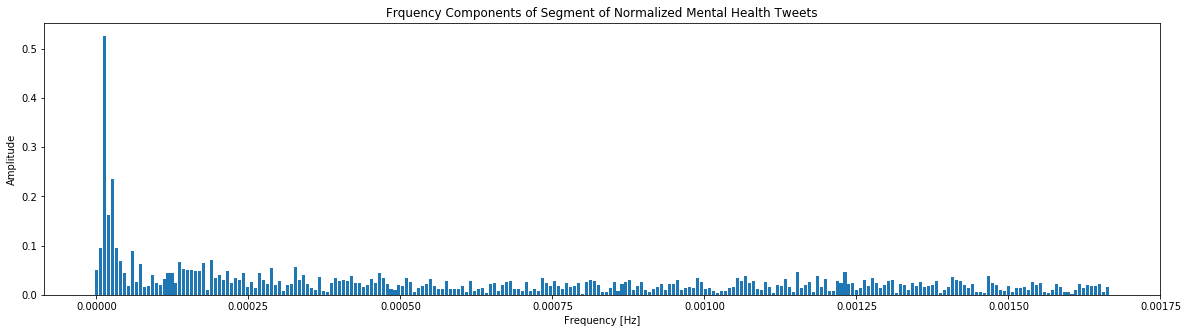

In [24]:
T = 60*5 # Tweets (per 5 min) was sampled with a period of 5 mins
N = tweets_segment.size

f = np.linspace(0, 1/T, N)
transform = np.abs(np.fft.fft(tweets_segment))[:N // 2] * 1 / N

plt.figure(figsize=(20, 5))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.bar(f[:N // 2], transform, width=0.000005)
plt.title("Frquency Components of Segment of Normalized Mental Health Tweets")
plt.show()

In [58]:
dom_freq = f[list(transform).index(max(transform))]
dom_period = 1/dom_freq
print('Dominant frequency: ' + str(round(dom_freq, 10)) + ' Hz')
print('Dominant period: ' + str(round(dom_period, 3)) + ' seconds')
print('Dominant period: ' + str(round(dom_period/(60*60*24), 3)) + ' days')

Dominant frequency: 1.30976e-05 Hz
Dominant period: 76350.0 seconds
Dominant period: 0.884 days


## Correlate Weather

### Plot Weather with Low Pass Filter

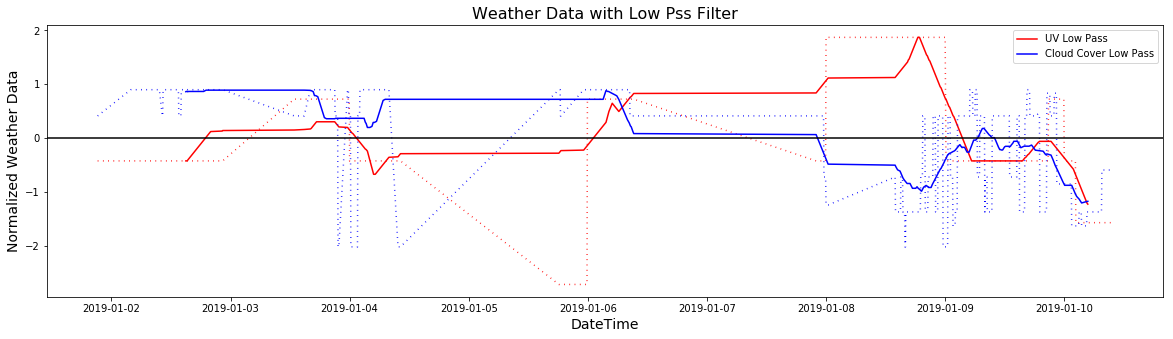

In [48]:
uv = data_normalized['UV']
cc = data_normalized['CloudCover']

windowSize = 5*24
lp_uv = uv.rolling(windowSize, center=True).mean()
lp_cc = cc.rolling(windowSize, center=True).mean()

plt.figure(figsize=(20, 5))
plt.plot(uv.index,uv,c='r', dashes=[0.5, 3])
uvlpf, = plt.plot(uv.index,lp_uv,c='r', label='UV Low Pass')
plt.plot(uv.index,cc,c='b', dashes=[0.5, 3],)
cclpf, = plt.plot(uv.index,lp_cc,c='b', label='Cloud Cover Low Pass')
plt.axhline(0, color='black')

plt.title("Weather Data with Low Pss Filter").set_fontsize(16)
plt.ylabel('Normalized Weather Data').set_fontsize(14)
plt.xlabel('DateTime').set_fontsize(14)

plt.legend(handles=[uvlpf, cclpf])


plt.show()

### Simple Pearsons Correlation

In [27]:
r1, p1 = st.pearsonr(uv, cc)

print (r1, p1)


-0.01055611424933735 0.7426443697744438


### Nonlinear Correlation

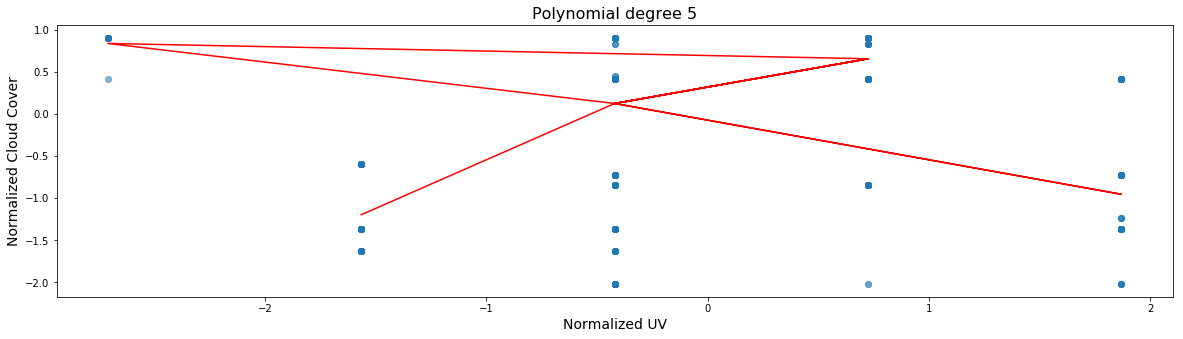

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline

x = np.array(uv)
y = np.array(cc)

model_1 = make_pipeline(PolynomialFeatures(degree = 5),LinearRegression())
model_1.fit(x.reshape(-1,1),y)
plt.figure(figsize = (20,5))
plt.scatter(x,y, alpha = .3)
plt.plot(x,model_1.predict(x.reshape(-1,1)), color = 'red', label = 'Model')
plt.title('Polynomial degree 5').set_fontsize(16)
plt.xlabel('Normalized UV').set_fontsize(14)
plt.ylabel('Normalized Cloud Cover').set_fontsize(14)
plt.show()

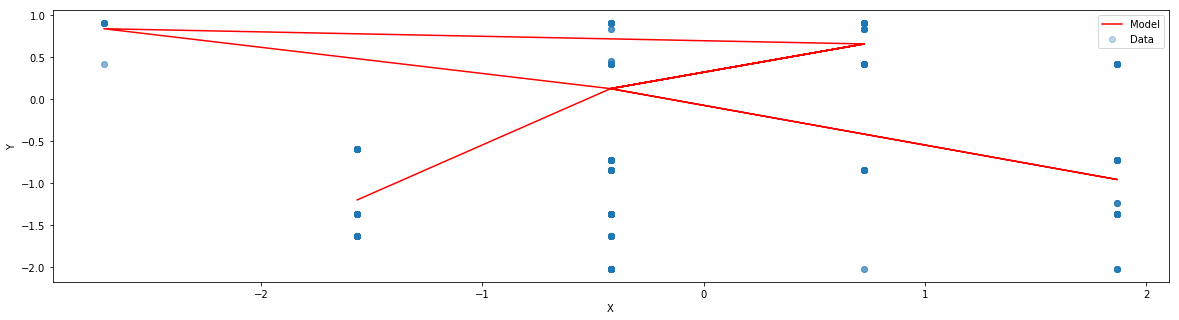

(<matplotlib.legend.Legend at 0xb0d5d30>, None)

In [44]:
from sklearn.tree import DecisionTreeRegressor
model_2 = DecisionTreeRegressor(max_depth = 3)
model_2.fit(x.reshape(-1,1),y)

plt.figure(figsize = (20,5))
plt.scatter(x,y, alpha = .3, label = 'Data')
plt.plot(x,model_2.predict(x.reshape(-1,1)), color = 'red', label = 'Model')
plt.xlabel('X'), plt.ylabel('Y')
plt.legend(), plt.show()

Correlation between weather data appears to be nonexistant